# Socrata API


For this project you will use `requests` package and the SODA API to access data through https://data.nashville.gov/. We'll start out with something familiar, the [Top 500 Monthly Searches](https://data.nashville.gov/Public-Services/Nashville-gov-Top-500-Monthly-Searches/fuaa-r5cm), then pull in different datasets further on. You will make different API requests for each individual question.

Each dataset has its own api endpoint. You can find the endpoint for a dataset by clicking on the `API` button in the top right of the dataset screen, then copying the `API Endpoint`. The default output is `JSON`, which you can leave unchanged:

![api_endpoint](assets/api_endpoint.png)

Each API is different, so it is very important to read the documentation for each API to know how to use it properly. The documentation for the SODA API is [here](https://dev.socrata.com/consumers/getting-started.html). It is **HIGHLY RECOMMENDED** that you read the documentation before making any requests, then do deeper dives into specific use cases when questions require. NOTE that the examples in the documentation don't use the `requests` package. You will need to look at the examples and figure out which things go in the `url` and which things go in the `params`.


#### Questions  

1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?  


2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  


3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  


4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.


#### Stretch Questions

5. Make an API request to pull back all the data from [hubNashville (311) Service Requests](https://data.nashville.gov/Public-Services/hubNashville-311-Service-Requests/7qhx-rexh) (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one)  


6. Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.  


#### Bonus

7. Socrata is used by many cities, states, and federal organizations. Find additional datasets through [Socrata's Open Data Network](http://www.opendatanetwork.com/) and do an analysis comparing them to Nashville or each other.


#### Show and Tell
At the end of the project you will present some general insights, visualizations, or other finding from any part of the project. This will be informal (showing your Jupyter notebook is fine, no need to make a powerpoint) and should be no more than 5 min. If you had challenges making your visualizations, then it is fine to discuss your experience working with the API and what you were intending to show.


In [78]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [79]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [80]:
response = requests.get(endpoint)

In [81]:
response

<Response [200]>

In [82]:
result = response.json()
result

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [83]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$query=SELECT * WHERE year = 2016 AND query_text = "fire" LIMIT 10000'

response = requests.get(endpoint)
result = response.json()
result

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [84]:
result_df = pd.DataFrame(result)
result_df

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire
5,June,2016,31,fire
6,July,2016,24,fire
7,August,2016,47,fire
8,September,2016,36,fire
9,October,2016,38,fire


In [85]:
result_df['query_count'] = result_df['query_count'].astype(int)
result_df

,month_name,year,query_count,query_text
0,January,2016,19,fire
1,February,2016,35,fire
2,March,2016,32,fire
3,April,2016,26,fire
4,May,2016,24,fire
5,June,2016,31,fire
6,July,2016,24,fire
7,August,2016,47,fire
8,September,2016,36,fire
9,October,2016,38,fire


<Axes: xlabel='query_count', ylabel='month_name'>

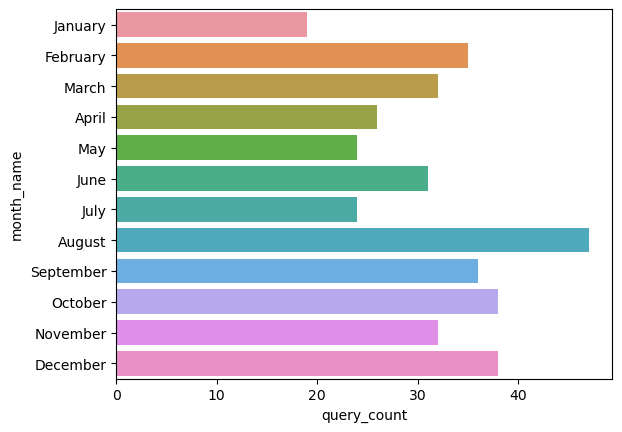

In [86]:
sns.barplot(result_df, x="query_count", y="month_name", orient = 'h')

Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [92]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$query=SELECT * WHERE query_count > 100 LIMIT 10000'


response = requests.get(endpoint)
result = response.json()
result

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

In [93]:
len(result)

1262

Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [94]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$query=SELECT * WHERE query_count > 100 AND query_text = "codes" LIMIT 10000'

response = requests.get(endpoint)
result = response.json()
result

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'July',
  'month': '7',
  'year': '2021',
  'query_count': '114',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'May',
  'month': '5',
  'year': '2021',
  'query_count': '115',
  'query_text': 'codes'

In [95]:
len(result)

56

Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [96]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$query=SELECT * LIMIT 100000'

response = requests.get(endpoint)
result = response.json()
result

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [97]:
len(result)

43677

In [102]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$query=SELECT * WHERE query_text = "maps" LIMIT 100000'

response = requests.get(endpoint)
result = response.json()
result

[{'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'February',
  'year': '2014',
  'query_count': '140',
  'query_text': 'maps'},
 {'month_name': 'March',
  'year': '2014',
  'query_count': '144',
  'query_text': 'maps'},
 {'month_name': 'April',
  'year': '2014',
  'query_count': '152',
  'query_text': 'maps'},
 {'month_name': 'May',
  'year': '2014',
  'query_count': '119',
  'query_text': 'maps'},
 {'month_name': 'June',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'July',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'August',
  'year': '2014',
  'query_count': '118',
  'query_text': 'maps'},
 {'month_name': 'September',
  'year': '2014',
  'query_count': '115',
  'query_text': 'maps'},
 {'month_name': 'October',
  'year': '2014',
  'query_count': '100',
  'query_text': 'maps'},
 {'month_name': 'November',
  'year': '2014',
  'query_count': '82',
  'q

In [101]:
maps_df = pd.DataFrame(result)
maps_df

,month_name,year,query_count,query_text,month
0,January,2014,97,maps,NaN
1,February,2014,140,maps,NaN
2,March,2014,144,maps,NaN
3,April,2014,152,maps,NaN
4,May,2014,119,maps,NaN
...,...,...,...,...,...
77,November,2020,86,maps,11
78,December,2020,113,maps,12
79,March,2021,132,maps,3
80,April,2021,148,maps,4


In [122]:
maps_df = maps_df[['month_name', 'query_count']].copy()
maps_df

,month_name,query_count
0,January,97
1,February,140
2,March,144
3,April,152
4,May,119
...,...,...
77,November,86
78,December,113
79,March,132
80,April,148


In [130]:
maps_df["query_count"] = pd.to_numeric(maps_df["query_count"])

In [132]:
maps_sum = maps_df.groupby("month_name").sum()

In [142]:
maps_sum = maps_sum.reset_index()

In [145]:
from calendar import month_name

lower_ma = [m.lower() for m in month_name]

maps_sum['month_no'] = maps_sum['month_name'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [150]:
maps_sum = maps_sum.sort_values("month_no")

<Axes: xlabel='query_count', ylabel='month_name'>

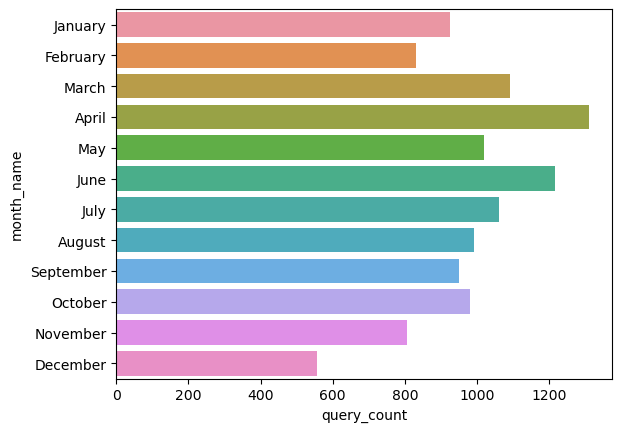

In [151]:
sns.barplot(maps_sum, x="query_count", y="month_name", orient = 'h')